In [215]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline 

<h2> Explorary data analysis </h2>

In [2]:
data = pd.read_csv('train.csv')

<h3> Analisis of class relationships with different variables </h3>

In [3]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
data[['Pclass','Survived']].groupby('Pclass').mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [5]:
data[['SibSp','Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [6]:
data[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [7]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [8]:
data[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<h3>Let's see to numerical values</h3>

C:\Users\Lab\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Lab\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


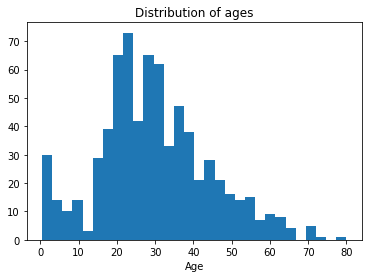

In [9]:
plt.figure()
plt.hist(data['Age'],bins=30);
plt.title('Distribution of ages');
plt.xlabel('Age');

<b>Relationship beetween age and sex</b>

C:\Users\Lab\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Lab\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


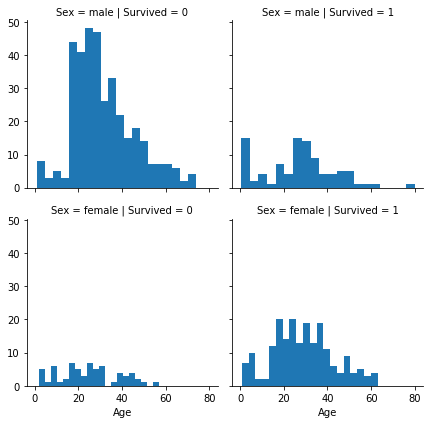

In [10]:
grid = sns.FacetGrid(data, col='Survived',row='Sex')
grid.map(plt.hist, 'Age',bins=20)
grid.add_legend()

<b>Obtains values of male and female in the boundaries and values of boundaries too</b>

Text(0.5, 0, 'Age')

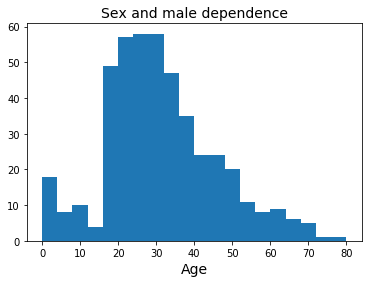

In [11]:
n_mail, bins_mail, trash = plt.hist(data[data['Sex']=='male']['Age'],bins=np.arange(0,81,4))
plt.title('Sex and male dependence',size=14);
plt.xlabel('Age',size=14)

Text(0.5, 0, 'Age')

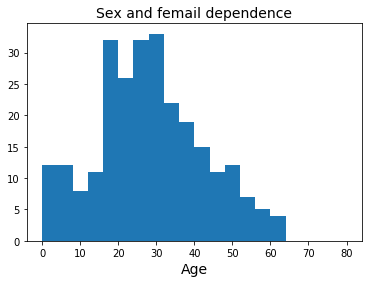

In [12]:
n_femail, bins_femail, trash = plt.hist(data[data['Sex']=='female']['Age'],bins=np.arange(0,81,4))
plt.title('Sex and femail dependence',size=14);
plt.xlabel('Age',size=14)

Boundaries and values:

In [13]:
print(bins_mail)
print(bins_femail)
print(n_mail)
print(n_femail)

[ 0  4  8 12 16 20 24 28 32 36 40 44 48 52 56 60 64 68 72 76 80]
[ 0  4  8 12 16 20 24 28 32 36 40 44 48 52 56 60 64 68 72 76 80]
[18.  8. 10.  4. 49. 57. 58. 58. 47. 35. 24. 24. 20. 11.  8.  9.  6.  5.
  1.  1.]
[12. 12.  8. 11. 32. 26. 32. 33. 22. 19. 15. 11. 12.  7.  5.  4.  0.  0.
  0.  0.]


Text(0.5, 0, 'Age')

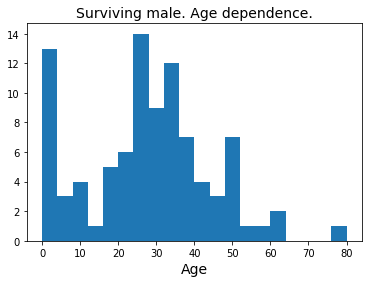

In [14]:
n_male_1, bins_male_1, patches = plt.hist(data[(data['Survived'] == 1) & (data['Sex'] == 'male')]['Age'],bins=bins_mail)
plt.title('Surviving male. Age dependence.',size=14)
plt.xlabel('Age',size=14)

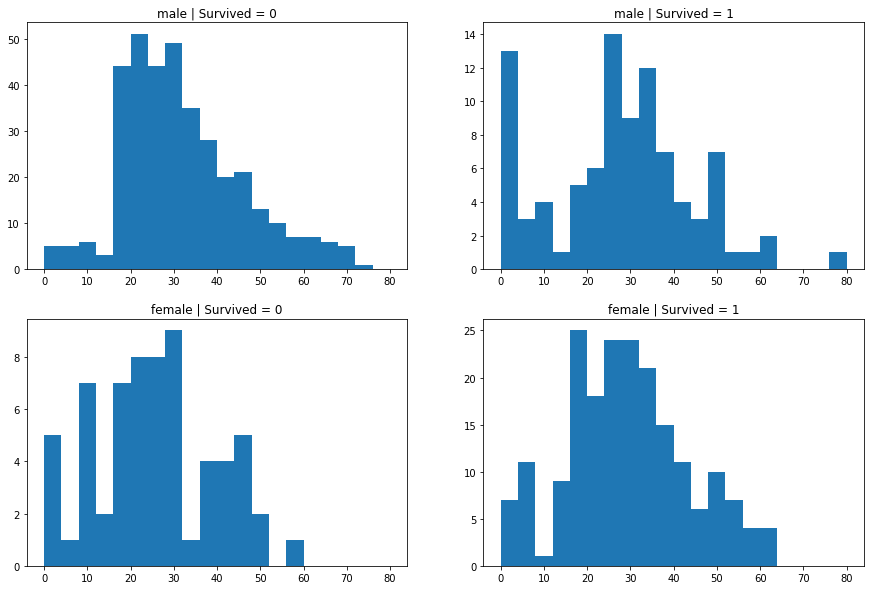

In [15]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
Surv = (0,1,0,1)
Sex  = ('male','male','female','female')
ns = []   #Value of hist element
bins = [] #Boundaries of hist elements

for ax, Sr, Se in zip(axes.flatten(),Surv,Sex):
    tmp1 , tmp2, tmp3 = ax.hist(data[(data['Survived'] == Sr) & 
                   (data['Sex'] == Se)]['Age'],bins=bins_mail)
    ax.set_title(Se+' | Survived = '+str(Sr)) 

    ns.append(tmp1)
    bins.append(tmp2)    

<b>Empiricaly probabylity of to (no)survived</b>

Calculate the probabylity to (no)survive. We take the number of (no)survivors in sum group and divides it to total numbers of elements in the group.
It's clear, that for different bins there are different variance. If we have one value (for example, age=80), than unbiased variance is inf. It will be good to calculate and plot variance, but not now. 

C:\Users\Lab\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


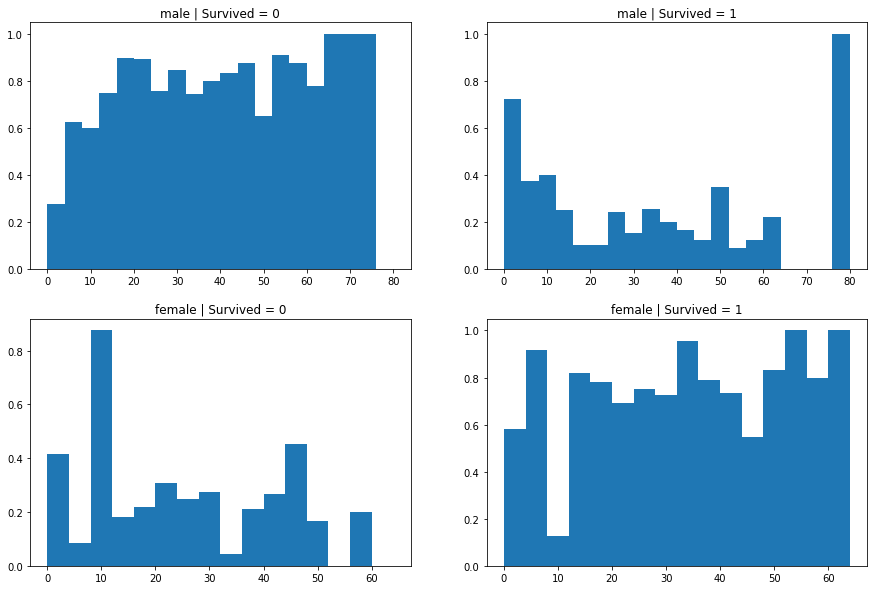

In [16]:
divided = (n_mail,n_mail,n_femail,n_femail)
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

for ax,n,b,dv,Sr,Se in zip(axes.flatten(),ns,bins,divided,Surv,Sex):
    ax.bar(b[:-1],height=n/dv,width=4,align='edge')
    ax.set_title(Se+' | Survived = '+str(Sr)) 
    

We can see, if you middle male, than you chances to survive is not great. 

<b>Let's see to passenger fare</b>

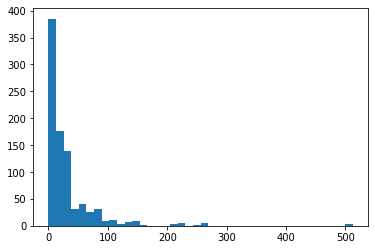

In [17]:
n_fare,bins_fare, trash = plt.hist(data['Fare'],bins=40)

Let will drop outlier from data (fare>300)

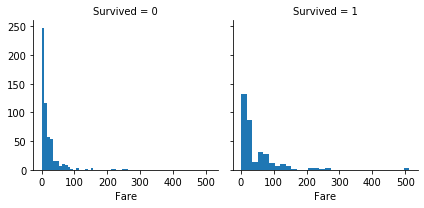

In [18]:
grid = sns.FacetGrid(data,col='Survived')
grid.map(plt.hist,'Fare',bins=30)

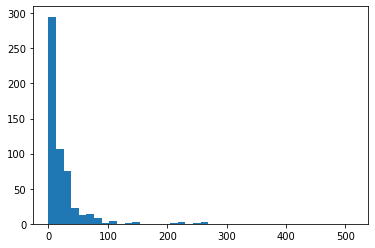

In [19]:
n_fare_0, trash1, trash2 = plt.hist(data[data['Survived'] == 0]['Fare'],bins=bins_fare) 

Text(0.5, 0, 'Fare')

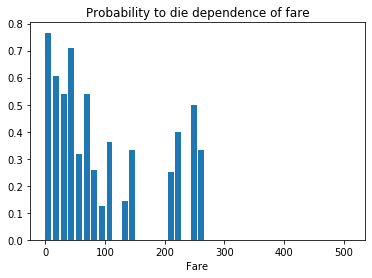

In [20]:
n_fare[n_fare == 0] = 1
plt.bar(bins_fare[:-1],height=n_fare_0/n_fare,width=10,align='edge')
plt.title('Probability to die dependence of fare')
plt.xlabel('Fare')

In my opinion it's not strong dependences from fare. But may be fare of 200-300 is outlier. Then high price give a better chance to survive.

<h2>Data preparing</h2>

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [204]:
y = data.iloc[:,1]
missing_drop = ['PassengerId','Name','Ticket']
X = data.drop(columns=['PassengerId','Name','Ticket','Survived'] )

#Delete columns with a lot of missing values. 
#Add this columns names to drop list
def drop_data(X):    

    missing = X.isnull().sum()
    missing = missing[missing >0]
    missing.sort_values(inplace=True)
    
    #We will drop all variables with missing values greater than 0.5
    tmp = missing[missing/X.shape[0] > .5].index
    X.drop(tmp, axis=1, inplace=True)
    
    return X,missing
    
X,missing = drop_data(X)
#Compare list for dropping indexes from test data
missing_drop.append((missing[missing/X.shape[0] > .5]).index[0])

In [23]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [24]:
print(missing/X.shape[0])
print(missing_drop)

Embarked    0.002245
Age         0.198653
Cabin       0.771044
dtype: float64
['PassengerId', 'Name', 'Ticket', 'Survived', 'Cabin']


In [25]:
def divid_ncat(X):
    dictX = dict(X.dtypes)

    cate_keys = []
    numeric_key = []
    for keyX in dictX.keys():
        if (str(dictX[keyX]) != 'object'):
            numeric_key.append(keyX)
        elif str(dictX[keyX]) == 'object':
            cate_keys.append(keyX)
    return cate_keys,numeric_key
cate_keys,numeric_key = divid_ncat(X)
print(cate_keys,'\n')
print(numeric_key)

['Sex', 'Embarked'] 

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [26]:
def replace_missing(Xnum):
    cols_with_missing = [col for col in Xnum.columns if Xnum[col].isna().any()] #colums with missings
    for col in cols_with_missing:
        aver = Xnum[col].mean()
        Xnum[col] = Xnum[col].fillna(aver) #Replace by nulls
    return Xnum

Xnum  = X[numeric_key]
Xcate = X[cate_keys]

Xnum = replace_missing(Xnum)


C:\Users\Lab\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [68]:
for cols in np.arange(Xcate_num.shape[1]):
    print(cols)

0
1


In [76]:
#Encoding categorial values
#Use ordinal encoder because there are 
#~linear relationsheap between Sex/Embarked and Survive
#Embarked is strange, of course, but as a first approximation is ok
def replace_missing_numpy(Xcate_num):
    #replace nans in mumpy array by mean values
    for cols in np.arange(Xcate_num.shape[1]):
        meanXcate = np.nanmean(Xcate_num[cols])
        Xcate_num[ np.isnan(Xcate_num) ] = meanXcate
    return Xcate_num
        
enc = preprocessing.OrdinalEncoder()
Xcate_num = enc.fit_transform(Xcate)

Xcate_num = replace_missing_numpy(Xcate_num)

In [81]:
#In fact correlations is absent 
print(Xnum.corrwith(y).sort_values(ascending=False))

Fare      0.257307
Parch     0.081629
SibSp    -0.035322
Age      -0.069809
Pclass   -0.338481
dtype: float64


In [89]:
X2 = np.hstack((Xnum.to_numpy(),Xcate_num))
scal = preprocessing.StandardScaler()
X2 = scal.fit_transform(X2)

In [107]:
X2_train, X2_test, y_train, y_test = train_test_split(X2,y.to_numpy(),test_size=.25)

<h2> Train models </h2>

<h3>Linear classifier</h3>

In [149]:
from sklearn import linear_model
from sklearn import model_selection
Clf = linear_model.SGDClassifier()

In [152]:
parameters_grid = {
    'loss':('hinge','log','modified_huber','squared_error'),
    'penalty':('l2','l1'),
    'alpha':np.logspace(-1,5,15),
    'shuffle': [False]
}
grid_cv = model_selection.GridSearchCV(Clf,parameters_grid,scoring='accuracy',n_jobs=2,cv=5)

In [153]:
grid_cv.fit(X2_train,y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(), n_jobs=2,
             param_grid={'alpha': array([1.00000000e-01, 2.68269580e-01, 7.19685673e-01, 1.93069773e+00,
       5.17947468e+00, 1.38949549e+01, 3.72759372e+01, 1.00000000e+02,
       2.68269580e+02, 7.19685673e+02, 1.93069773e+03, 5.17947468e+03,
       1.38949549e+04, 3.72759372e+04, 1.00000000e+05]),
                         'loss': ('hinge', 'log', 'modified_huber',
                                  'squared_error'),
                         'penalty': ('l2', 'l1'), 'shuffle': [False]},
             scoring='accuracy')

In [154]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.8039277297721916
{'alpha': 0.1, 'loss': 'log', 'penalty': 'l2', 'shuffle': False}


In [167]:
grid_cv.best_estimator_

SGDClassifier(alpha=0.1, loss='log', shuffle=False)

In [169]:
bClf = grid_cv.best_estimator_

In [170]:
def metrics_score(y_pred,y,strng):
    print(strng)
    print(y[:20])
    print(y_pred[:20])              
    print('accuracy = {:.2f}'.format( accuracy_score(y,y_pred) ),'\n' )

In [171]:
y_predict = bClf.predict(X2_test)

In [172]:
metrics_score(bClf.predict(X2_train),y_train,'Predict on train')
metrics_score(bClf.predict(X2_test),y_test,'Predict on test')

Predict on train
[0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1]
[1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0]
accuracy = 0.81 

Predict on test
[0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1]
accuracy = 0.80 



In [210]:
#Write into file
data2 = pd.read_csv('test.csv')
data2.head()
#del missing_drop[3]
data2.drop(columns=missing_drop)
data2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [218]:
Xsub = data2.drop(columns=missing_drop) #X submission

Xnum  = Xsub[numeric_key]
Xcate = Xsub[cate_keys]

Xnum = replace_missing(Xnum)

Xcate_num = enc.fit_transform(Xcate)
Xcate_num = replace_missing_numpy(Xcate_num)

Xsub2 = np.hstack((Xnum.to_numpy(),Xcate_num))

Xsub2 = scal.transform(Xsub2)
y_test_pred = bClf.predict(Xsub2)

C:\Users\Lab\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [222]:
y_sub_best_linear_estimator = {
    'PassengerId' : data2['PassengerId'],
    'Survived'    : y_test_pred
}
y_df_sub = pd.DataFrame(y_sub_best_linear_estimator)
y_df_sub.to_csv('best_linear_estimator.csv',index=False)

In [225]:
Public_scores = {}
Public_scores['best_linear_estimator'] = 0.76794
print(Public_scores)

{'best_linear_estimator': 0.76794}


<h3> Random Forest </h3>

In [256]:
ForestClf = RandomForestClassifier(n_estimators=100)
ForestClf.fit(X2_train,y_train)
metrics_score(ForestClf.predict(X2_train),y_train,'Predict on train')
metrics_score(ForestClf.predict(X2_test),y_test,'Predict on test')

Predict on train
[0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1]
[0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1]
accuracy = 0.99 

Predict on test
[0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0]
accuracy = 0.81 



In [228]:
y_test_pred = ForestClf.predict(Xsub2)
y_sub_RForest = {
    'PassengerId' : data2['PassengerId'],
    'Survived'    : y_test_pred
}
y_df_sub = pd.DataFrame(y_sub_RForest)
y_df_sub.to_csv('RForest.csv',index=False)

In [229]:
Public_scores['Rforest'] = 0.76315
print(Public_scores)

{'best_linear_estimator': 0.76794, 'Rforest': 0.76315}


<h3>XGBoost</h3>

In [248]:
import xgboost as xgb
XClf = xgb.XGBClassifier(n_estimators=2000, use_label_encoder=False, 
                             learning_rate=0.001, max_depth=5, 
                             nthread = -1)

In [249]:
XClf.fit(X2_train,y_train)
metrics_score(XClf.predict(X2_train),y_train,'Predict on train')
metrics_score(XClf.predict(X2_test),y_test,'Predict on test')

[11:29:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Predict on train
[0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1]
[1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0]
accuracy = 0.86 

Predict on test
[0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0]
accuracy = 0.83 



In [250]:
y_test_pred = XClf.predict(Xsub2)
y_sub_XGB = {
    'PassengerId' : data2['PassengerId'],
    'Survived'    : y_test_pred
}
y_df_sub = pd.DataFrame(y_sub_XGB)
y_df_sub.to_csv('XGB.csv',index=False)

In [257]:
Public_scores['XGB'] = 0.77511
print(Public_scores)

{'best_linear_estimator': 0.76794, 'Rforest': 0.76315, 'XGB': 0.77511}


In [281]:
results = pd.DataFrame.from_dict(Public_scores,orient='index', columns=['Public score'])
results.sort_values('Public score',ascending=False)

,Public score
XGB,0.77511
best_linear_estimator,0.76794
Rforest,0.76315
